In [1]:
import pandas as pd
import numpy as np
from scipy.stats import mode
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore, boxcox
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import LabelEncoder
sns.set_context('paper')
from sklearn.preprocessing import OneHotEncoder

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn import metrics
import statsmodels.api as sm
from sklearn.linear_model import Lasso, Ridge

In [4]:
test = pd.read_csv(r'c:\Users\kanch\oneDrive\Desktop\BIG MART SALES\Test.csv')
train = pd.read_csv(r'c:\Users\kanch\oneDrive\Desktop\BIG MART SALES\Train.csv')

In [5]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [7]:
test.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
5676,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1
5680,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1


In [8]:
train.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [9]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [11]:
print(train.shape)
print(test.shape)

(8523, 12)
(5681, 11)


In [12]:
train.mean()

Item_Weight                    12.857645
Item_Visibility                 0.066132
Item_MRP                      140.992782
Outlet_Establishment_Year    1997.831867
Item_Outlet_Sales            2181.288914
dtype: float64

## Data Cleaning

In [13]:
train.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [14]:
train.Item_Visibility.value_counts()

0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

In [15]:
train.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [16]:
test['Item_Outlet_Sales'] = 1
test.Item_Outlet_Sales.head()

0    1
1    1
2    1
3    1
4    1
Name: Item_Outlet_Sales, dtype: int64

In [17]:
combine = pd.concat([train,test])
combine.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [18]:
crosstable = pd.crosstab(train['Outlet_Size'],train['Outlet_Type'])
crosstable

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0,932,0,0
Medium,0,930,928,935
Small,528,1860,0,0


In [19]:
train.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [20]:
dic = {'Grocery Store':'Small'}
s = train.Outlet_Type.map(dic)

In [21]:
train.Outlet_Size= train.Outlet_Size.combine_first(s)
train.Outlet_Size.value_counts()

Small     2943
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

In [22]:
train.isnull().sum(axis=0)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1855
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [23]:
#checking for location type
crosstable = pd.crosstab(train.Outlet_Size,train.Outlet_Location_Type)
crosstable

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,932
Medium,930,0,1863
Small,1458,930,555


#### From the above table it is evident that all the Tier 2 stores are of small types

##### Therefore mapping Tier 2 store and small size

In [24]:
dic = {"Tier 2":"Small"}
s = train.Outlet_Location_Type.map(dic)
train.Outlet_Size = train.Outlet_Size.combine_first(s)
train.Outlet_Size.value_counts()

Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

In [25]:
train.isnull().sum(axis=0)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [26]:
train.Item_Identifier.value_counts().sum()

8523

In [27]:
#Fill missing values of weight of Item According to means of Item Identifier
train['Item_Weight']=train['Item_Weight'].fillna(train.groupby('Item_Identifier')['Item_Weight'].transform('mean'))
train.isnull().sum()

Item_Identifier              0
Item_Weight                  4
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [28]:
train[train.Item_Weight.isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [29]:
# List of item types 
item_type_list = train.Item_Type.unique().tolist()
item_type_list

['Dairy',
 'Soft Drinks',
 'Meat',
 'Fruits and Vegetables',
 'Household',
 'Baking Goods',
 'Snack Foods',
 'Frozen Foods',
 'Breakfast',
 'Health and Hygiene',
 'Hard Drinks',
 'Canned',
 'Breads',
 'Starchy Foods',
 'Others',
 'Seafood']

In [30]:
# grouping based on item type and calculating mean of item weight
Item_Type_Means = train.groupby('Item_Type')['Item_Weight'].mean() 

In [31]:
Item_Type_Means

Item_Type
Baking Goods             12.285317
Breads                   11.297689
Breakfast                12.779727
Canned                   12.403320
Dairy                    13.379905
Frozen Foods             12.782404
Fruits and Vegetables    13.236713
Hard Drinks              11.456238
Health and Hygiene       13.052327
Household                13.524780
Meat                     12.771212
Others                   13.979438
Seafood                  12.521953
Snack Foods              13.031230
Soft Drinks              11.879775
Starchy Foods            13.841385
Name: Item_Weight, dtype: float64

In [32]:
# Mapiing Item weight to item type mean
for i in item_type_list:
    dic = {i:Item_Type_Means[i]}
    s = train.Item_Type.map(dic)
    train.Item_Weight = train.Item_Weight.combine_first(s)
    
Item_Type_Means = train.groupby('Item_Type')['Item_Weight'].mean() 

train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [33]:
Item_Type_Mean = train.groupby('Item_Type')['Item_Visibility'].mean()

In [34]:
Item_Type_Mean

Item_Type
Baking Goods             0.069169
Breads                   0.066255
Breakfast                0.085723
Canned                   0.068129
Dairy                    0.072427
Frozen Foods             0.065645
Fruits and Vegetables    0.068513
Hard Drinks              0.064943
Health and Hygiene       0.055216
Household                0.061322
Meat                     0.062284
Others                   0.060241
Seafood                  0.074976
Snack Foods              0.066850
Soft Drinks              0.063972
Starchy Foods            0.067564
Name: Item_Visibility, dtype: float64

In [35]:
train.isnull().any() # no missing values

Item_Identifier              False
Item_Weight                  False
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                  False
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

In [36]:
train.Item_Visibility.value_counts().head() # There are 526 values with 0 Item visibility

0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
Name: Item_Visibility, dtype: int64

In [37]:
# Replacing 0's with NaN
train.Item_Visibility.replace(to_replace=0.000000,value=np.NaN,inplace=True)
# Now fill by mean of visbility based on item identifiers
train.Item_Visibility = train.Item_Visibility.fillna(train.groupby('Item_Identifier')['Item_Visibility'].transform('mean'))

In [38]:
train.Item_Visibility.value_counts().head()

0.121880    4
0.027777    3
0.029511    3
0.081428    3
0.016164    3
Name: Item_Visibility, dtype: int64

### Renaming Item_Fat_Content levels

In [39]:
train.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [40]:
train.Item_Fat_Content.replace(to_replace=["LF","low fat"],value="Low Fat",inplace=True)
train.Item_Fat_Content.replace(to_replace="reg",value="Regular",inplace=True)

train.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### Encoding Categorical Variables

In [41]:
var_cat = train.select_dtypes(include=[object])
var_cat.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Small,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [42]:
var_cat = var_cat.columns.tolist()
var_cat = ['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

var_cat

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [43]:
train['Item_Type_New'] = train.Item_Identifier
train.Item_Type_New.head(10)

0    FDA15
1    DRC01
2    FDN15
3    FDX07
4    NCD19
5    FDP36
6    FDO10
7    FDP10
8    FDH17
9    FDU28
Name: Item_Type_New, dtype: object

In [44]:
train.Item_Type_New.replace(to_replace="^FD*.*",value="Food",regex=True,inplace=True)
train.Item_Type_New.replace(to_replace="^DR*.*",value="Drinks",regex=True,inplace=True)
train.Item_Type_New.replace(to_replace="^NC*.*",value="Non-Consumable",regex=True,inplace=True)

train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_New
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,FDX07,19.20,Regular,0.022911,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food
4,NCD19,8.93,Low Fat,0.016164,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable


In [45]:
le = LabelEncoder()

In [46]:
train['Outlet'] = le.fit_transform(train.Outlet_Identifier)
train['Item'] = le.fit_transform(train.Item_Type_New)
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_New,Outlet,Item
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,9,1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,3,0
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,9,1
3,FDX07,19.20,Regular,0.022911,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,0,1
4,NCD19,8.93,Low Fat,0.016164,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,1,2


In [47]:
for i in var_cat:
    train[i] = le.fit_transform(train[i])

train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_New,Outlet,Item
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380,Food,9,1
1,DRC01,5.92,1,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228,Drinks,3,0
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700,Food,9,1
3,FDX07,19.20,1,0.022911,6,182.0950,OUT010,1998,2,2,0,732.3800,Food,0,1
4,NCD19,8.93,0,0.016164,9,53.8614,OUT013,1987,0,2,1,994.7052,Non-Consumable,1,2


In [48]:
combine.shape

(14204, 12)

In [49]:
data=combine.drop('Item_Identifier',axis=1)

In [50]:
var_cat = combine.select_dtypes(include=[object])
var_cat.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [51]:
for i in var_cat:
    combine[i] = le.fit_transform(combine[i])

combine.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,3,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [52]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  int32  
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  int32  
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  int32  
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  int32  
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  int32  
 9   Outlet_Location_Type       14204 non-null  int32  
 10  Outlet_Type                14204 non-null  int32  
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int32(7), int64(1)
memory usage: 1.0 MB


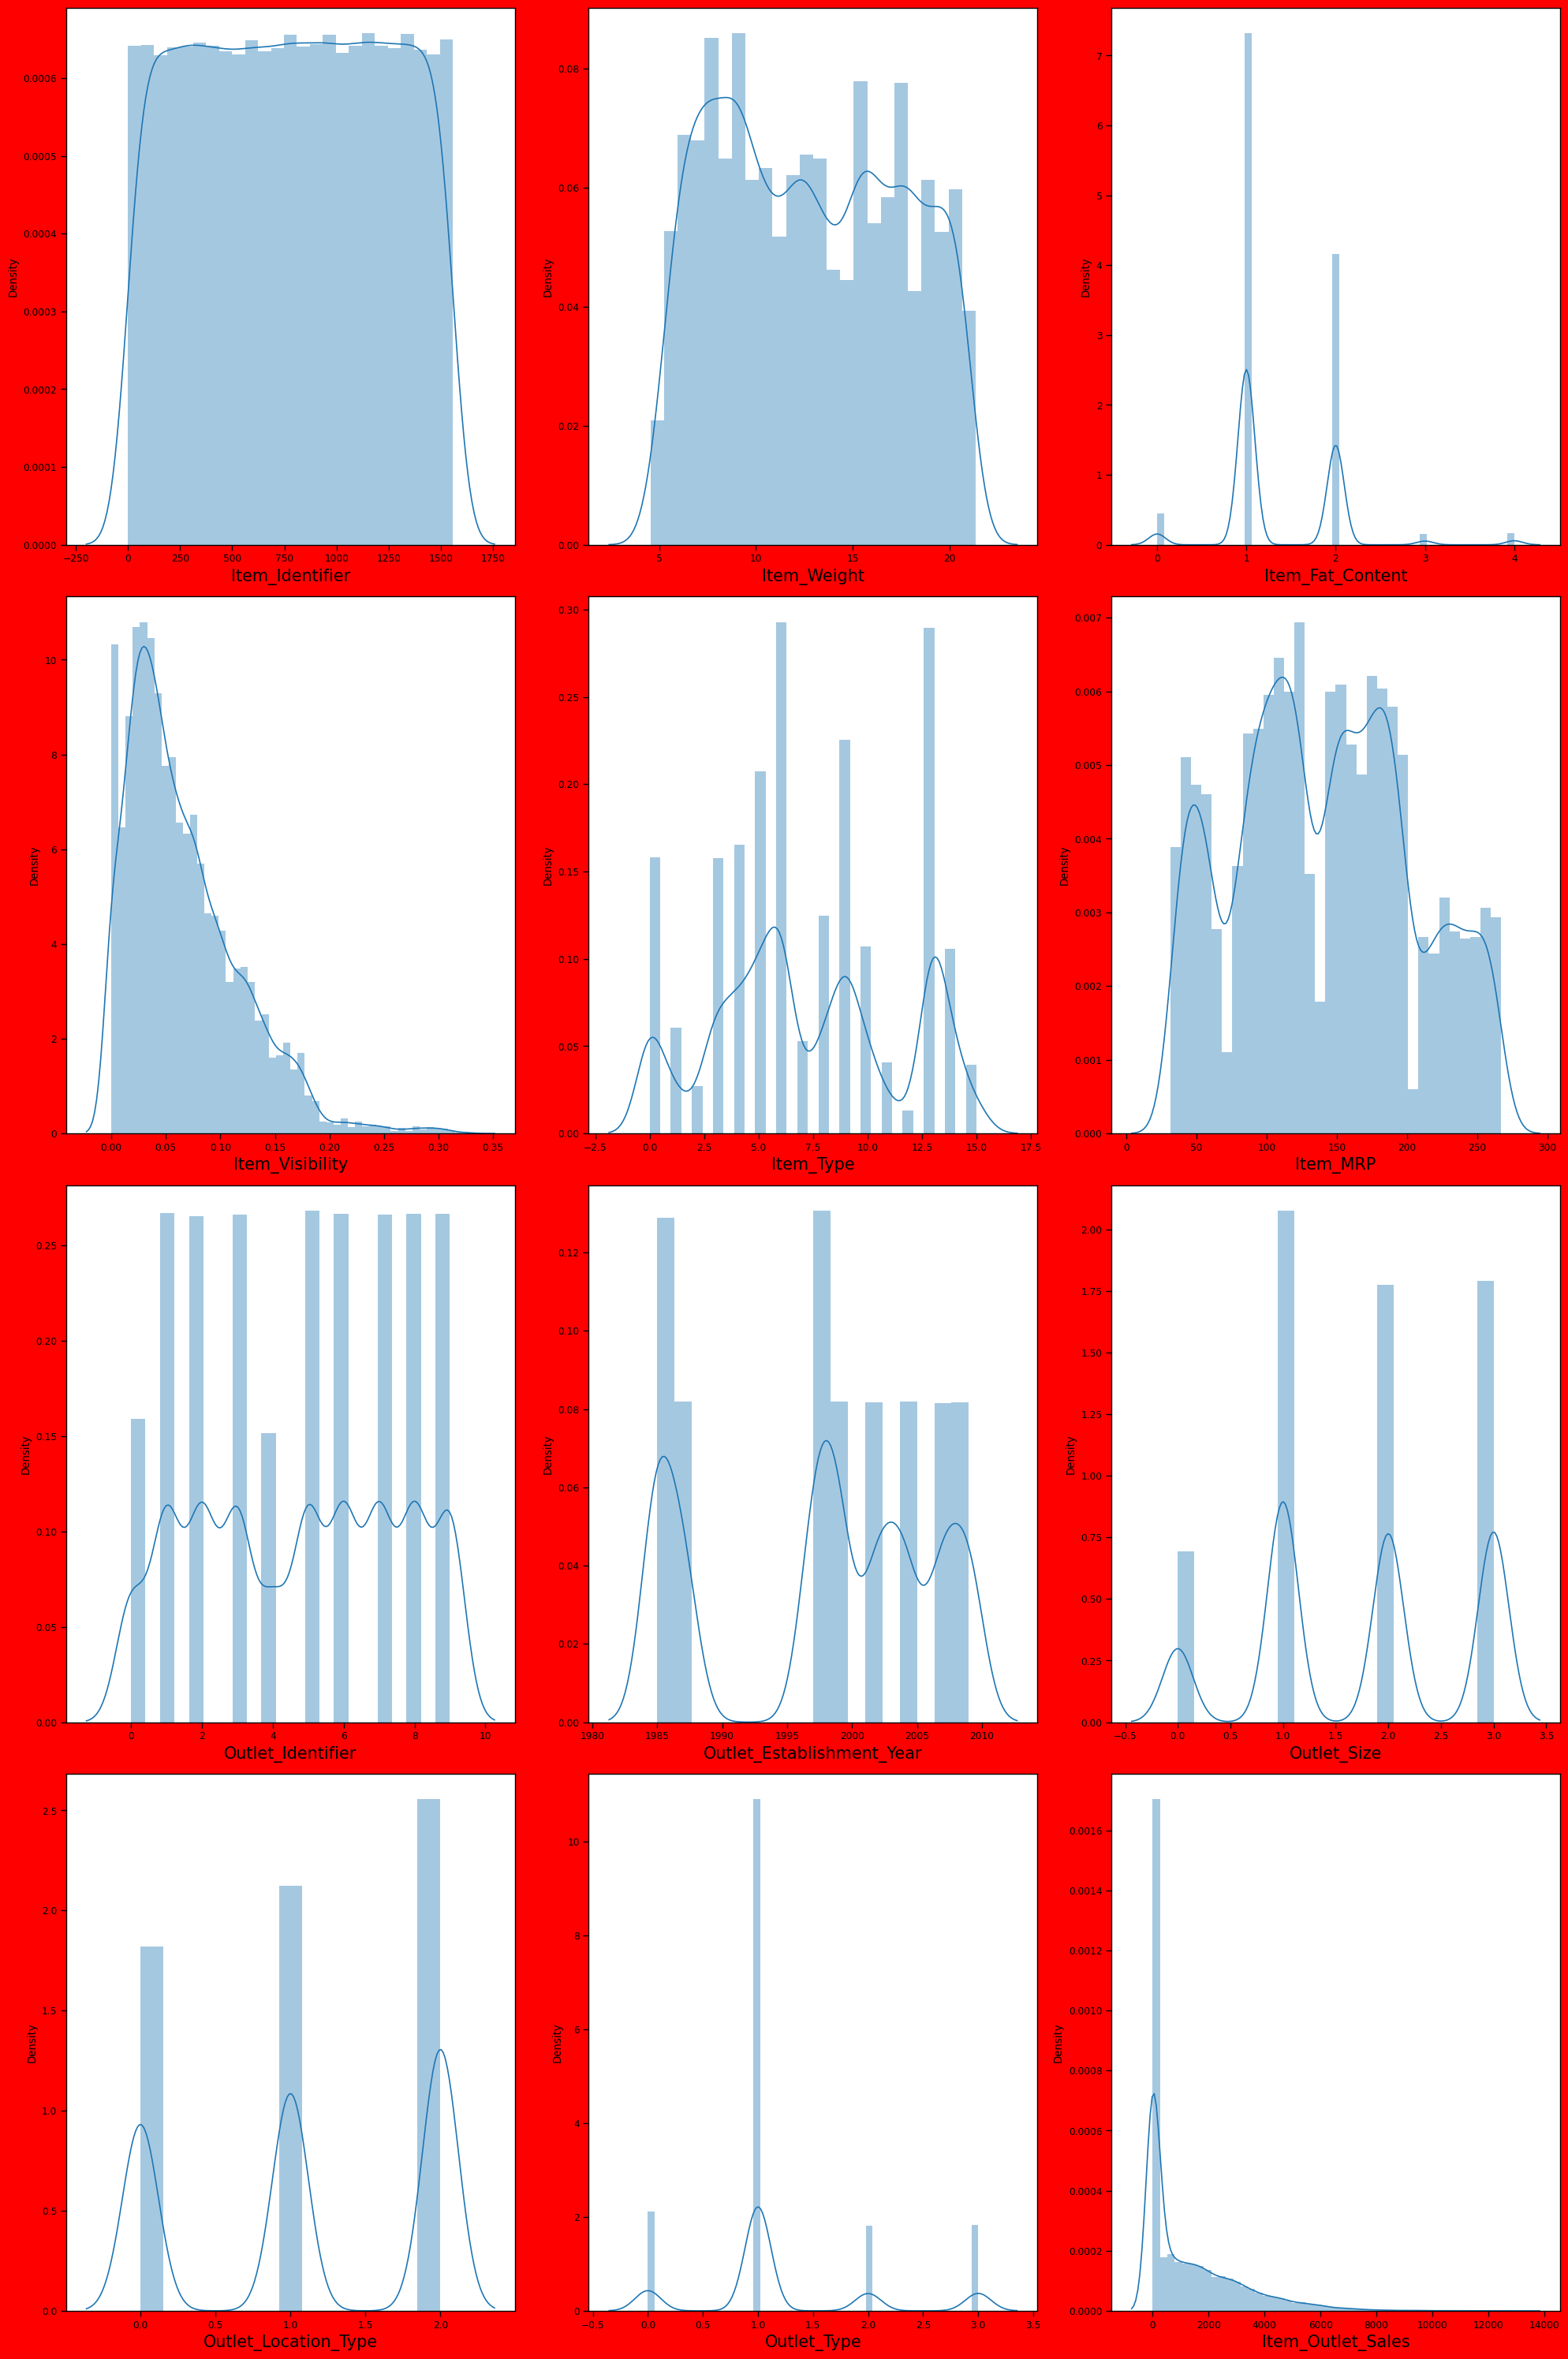

In [53]:
#Let's see how data is distributed for every column
plt.figure(figsize = (20,30) , facecolor='red')
plotnumber=1

for columns in combine:
    if plotnumber <=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(combine[columns])
        plt.xlabel(columns,fontsize=15)
    plotnumber+=1
    
plt.tight_layout()

In [54]:
df_feature = combine.drop('Outlet_Location_Type', axis = 1)
combine.shape

(14204, 12)

Visualize the Outliers Using Boxplot

In [55]:
#Visualizing Correlation
corrmat = train.corr()
corrmat

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet,Item
Item_Weight,1.000000,-0.026797,-0.021226,0.035710,0.025967,-0.013417,-0.012445,0.002973,0.000592,0.013198,-0.007586,0.071585
Item_Fat_Content,-0.026797,1.000000,0.052620,-0.139434,0.006063,0.003151,-0.001262,-0.001598,0.002199,0.018719,0.000764,-0.166111
Item_Visibility,-0.021226,0.052620,1.000000,-0.042400,-0.005951,-0.075238,0.090322,-0.030449,-0.170752,-0.126026,-0.096282,-0.050520
Item_Type,0.035710,-0.139434,-0.042400,1.000000,0.032651,0.004970,-0.000218,0.003084,0.003053,0.017048,0.001656,0.007456
Item_MRP,0.025967,0.006063,-0.005951,0.032651,1.000000,0.005020,0.000872,0.000232,-0.001975,0.567574,0.003319,0.032517
Outlet_Establishment_Year,-0.013417,0.003151,-0.075238,0.004970,0.005020,1.000000,0.425534,-0.089216,-0.122304,-0.049135,0.079035,-0.008551
Outlet_Size,-0.012445,-0.001262,0.090322,-0.000218,0.000872,0.425534,1.000000,-0.480075,-0.401373,-0.162753,0.260272,-0.001276
Outlet_Location_Type,0.002973,-0.001598,-0.030449,0.003084,0.000232,-0.089216,-0.480075,1.000000,0.467219,0.089367,-0.716176,0.007661
Outlet_Type,0.000592,0.002199,-0.170752,0.003053,-0.001975,-0.122304,-0.401373,0.467219,1.000000,0.401522,0.099873,0.001136
Item_Outlet_Sales,0.013198,0.018719,-0.126026,0.017048,0.567574,-0.049135,-0.162753,0.089367,0.401522,1.000000,0.162325,0.011236


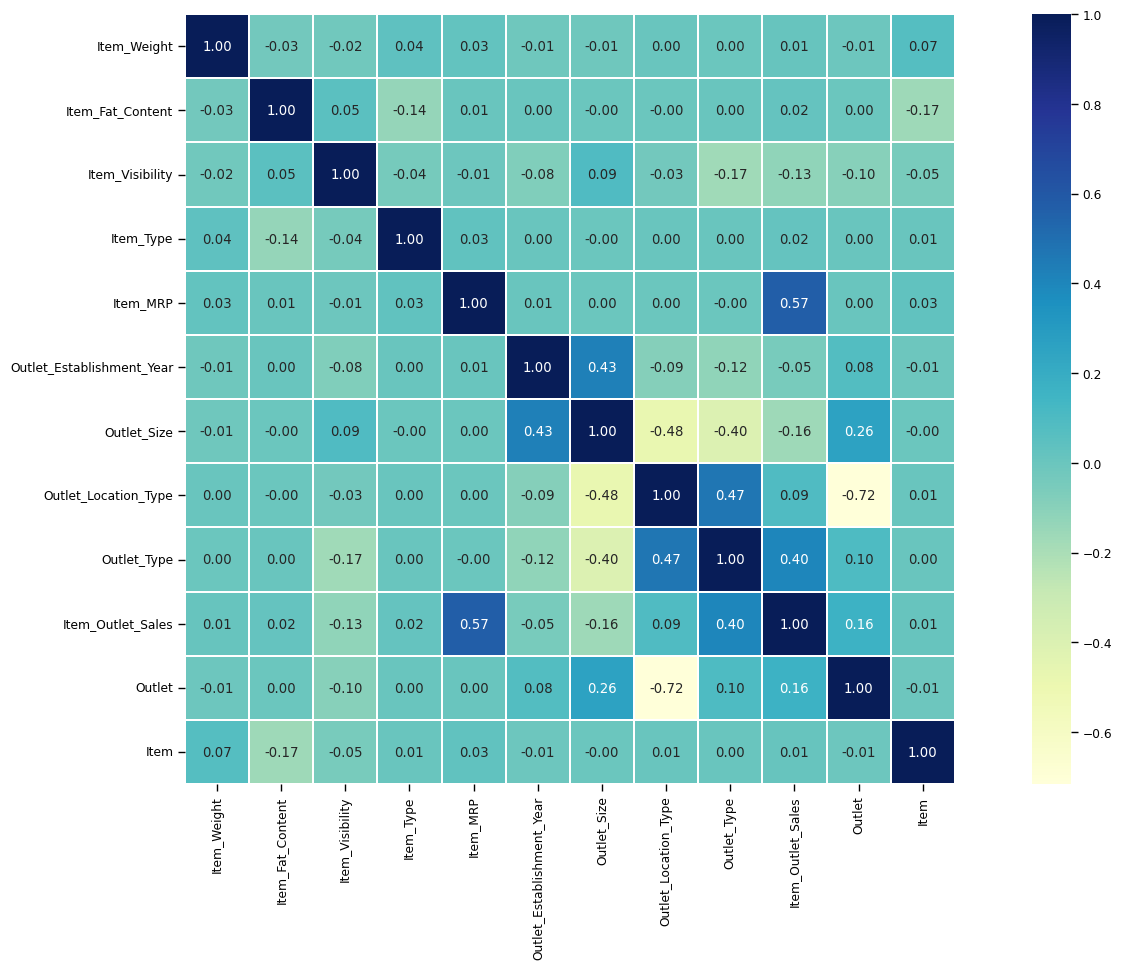

In [56]:
f,ax = plt.subplots(figsize = (20,10))
sns.heatmap(corrmat,annot=True,ax=ax,cmap="YlGnBu",linewidths=0.1,fmt=".2f",square=True)
plt.show()

### Visualzing the data

In [57]:
print(combine.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


In [58]:
combine.dtypes

Item_Identifier                int32
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Identifier              int32
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Sales            float64
dtype: object

In [59]:
predictors=['Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Size','Outlet_Location_Type','Outlet_Type','Outlet_Establishment_Year',
            'Outlet','Item','Item_Weight']
predictors

['Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Outlet_Establishment_Year',
 'Outlet',
 'Item',
 'Item_Weight']

In [60]:
#X = train[predictors]
#y = train.Item_Outlet_Sales

In [61]:
combine.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [62]:
#Fill missing values of weight of Item According to means of Item Identifier
combine['Item_Weight']=combine['Item_Weight'].fillna(combine.groupby('Item_Identifier')['Item_Weight'].transform('mean'))
combine.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [63]:
from sklearn.metrics import classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix, roc_curve,roc_auc_score
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [64]:
X = combine.drop(columns = ["Outlet_Type"])
y = combine["Outlet_Type"]

In [65]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)

In [66]:
def metric_score (clf, x_train,x_test,y_train,y_test, train = True):
    if train:
        y_pred = clf.predict(x_train)
        print("\n =================Train Result=====================")
        print(f"Accuracy Score : {accuracy_score(y_train,y_pred)*100:.2f}%")
    elif train == False:
        pred = clf.predict(x_test)
        print("\n==================Test Result=======================")
        print(f"Accuracy Score : {accuracy_score(y_test,pred)*100:.2f}%")
        
        print("\n \n Test Classification Report\n",classification_report(y_test,pred,digits=2))

In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
knn = KNeighborsClassifier()

In [69]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [70]:
metric_score(knn,X_train,X_test,y_train,y_test, train = True)
metric_score(knn,X_train,X_test,y_train,y_test, train = False)


 =================Train Result=====================
Accuracy Score : 74.43%

==================Test Result=======================
Accuracy Score : 69.14%

 
 Test Classification Report
               precision    recall  f1-score   support

           0       0.64      0.53      0.58       452
           1       0.72      0.93      0.81      2344
           2       0.17      0.03      0.05       379
           3       0.41      0.10      0.16       376

    accuracy                           0.69      3551
   macro avg       0.49      0.39      0.40      3551
weighted avg       0.62      0.69      0.63      3551



In [71]:
lr = LinearRegression()
model = lr.fit(X_train,y_train)
predictions = lr.predict(X_test)


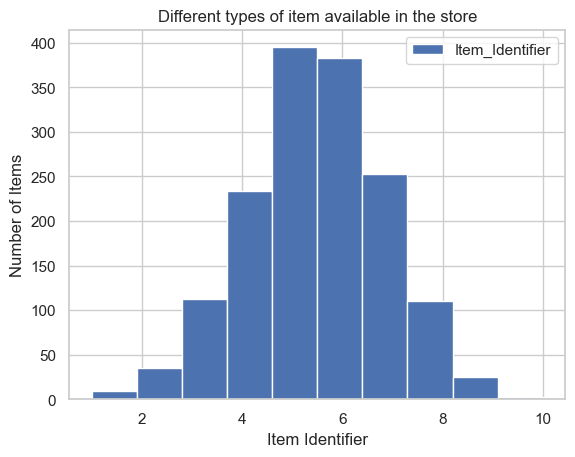

In [72]:
train['Item_Identifier'].value_counts(normalize = True)
train['Item_Identifier'].value_counts().plot.hist()
plt.title('Different types of item available in the store')
plt.xlabel('Item Identifier')
plt.ylabel('Number of Items')
plt.legend()
plt.show()

In [73]:

# checking the different items in Item Fat Content

train['Item_Fat_Content'].value_counts()


0    5517
1    3006
Name: Item_Fat_Content, dtype: int64

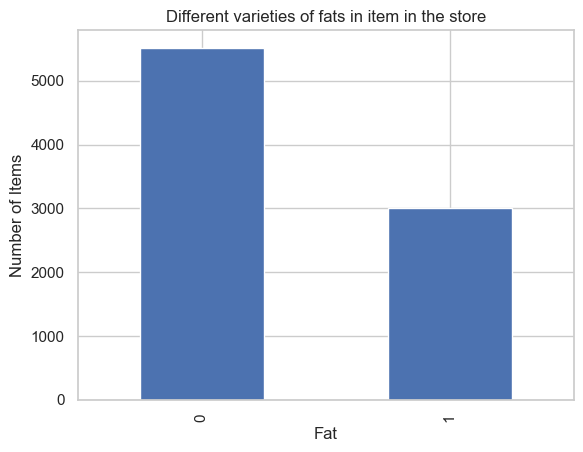

In [74]:
train['Item_Fat_Content'].value_counts(normalize = True)
train['Item_Fat_Content'].value_counts().plot.bar()
plt.title('Different varieties of fats in item in the store')
plt.xlabel('Fat')
plt.ylabel('Number of Items')
plt.show()

In [75]:
combine['Item_Type'].value_counts()

6     2013
13    1989
9     1548
5     1426
4     1136
0     1086
3     1084
8      858
10     736
14     726
1      416
7      362
11     280
15     269
2      186
12      89
Name: Item_Type, dtype: int64

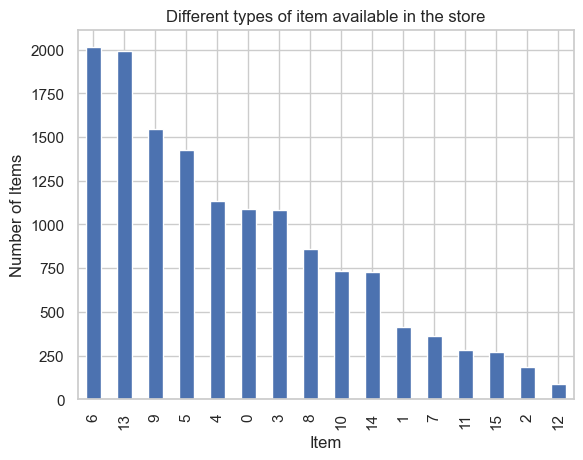

In [76]:
combine['Item_Type'].value_counts(normalize = True)
combine['Item_Type'].value_counts().plot.bar()
plt.title('Different types of item available in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

In [77]:
combine['Outlet_Identifier'].value_counts()

5    1559
1    1553
9    1550
8    1550
6    1550
7    1548
3    1546
2    1543
0     925
4     880
Name: Outlet_Identifier, dtype: int64

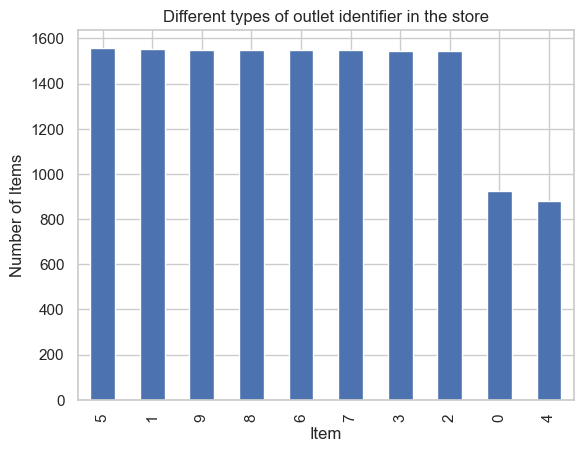

In [78]:
combine['Outlet_Identifier'].value_counts(normalize = True)
combine['Outlet_Identifier'].value_counts().plot.bar()
plt.title('Different types of outlet identifier in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

In [79]:
combine['Outlet_Size'].value_counts()

1    4655
3    4016
2    3980
0    1553
Name: Outlet_Size, dtype: int64

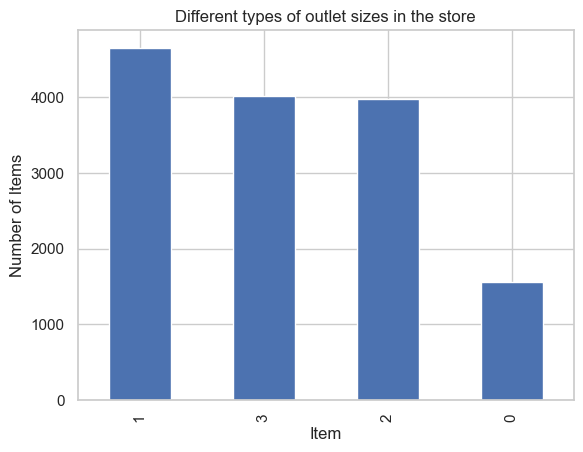

In [80]:
combine['Outlet_Size'].value_counts(normalize = True)
combine['Outlet_Size'].value_counts().plot.bar()
plt.title('Different types of outlet sizes in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

In [81]:
# checking unique values in the columns of train dataset

combine.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    434
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
dtype: int64

In [82]:
combine.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,3,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [83]:
from sklearn.preprocessing import StandardScaler

In [84]:
# Check multicollinearity problem Find if one feature is dependent on another feature
scalar = StandardScaler()
X_scalar = scalar.fit_transform(X)

In [85]:
# splitting the dataset into train and test

train = combine.iloc[:8523,:]
test = combine.iloc[8523:,:]

print(train.shape)
print(test.shape)

(8523, 12)
(5681, 12)


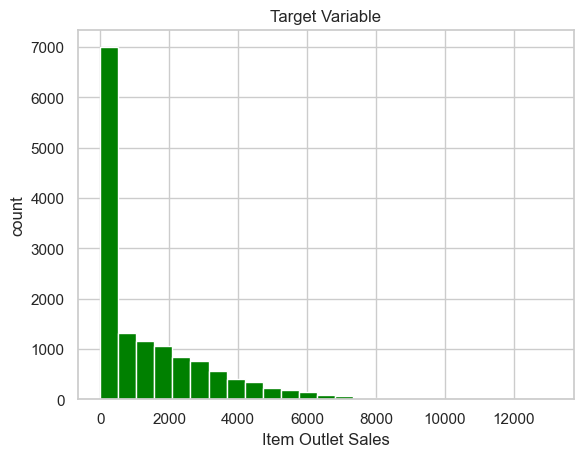

In [86]:
plt.hist(combine['Item_Outlet_Sales'], bins = 25, color = 'green')
plt.title('Target Variable')
plt.xlabel('Item Outlet Sales')
plt.ylabel('count')
plt.show()

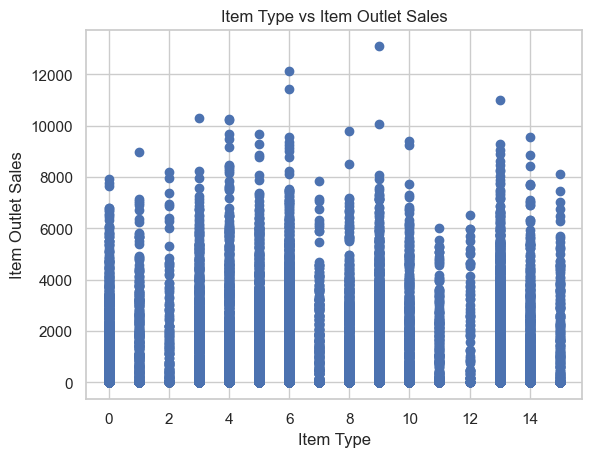

In [87]:
plt.scatter(combine.Item_Type,combine.Item_Outlet_Sales)
plt.xlabel("Item Type")
plt.ylabel("Item Outlet Sales")
plt.title("Item Type vs Item Outlet Sales")

plt.show()

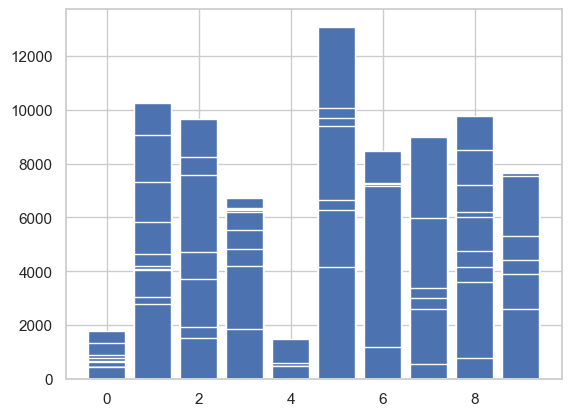

In [88]:
plt.bar(combine.Outlet_Identifier,combine.Item_Outlet_Sales)
plt.show()

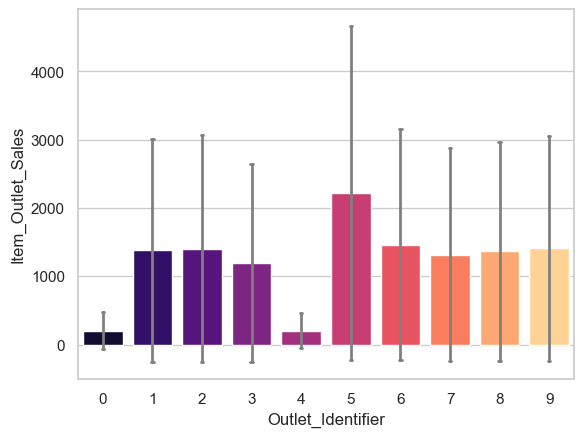

In [89]:
sns.barplot(x='Outlet_Identifier',y='Item_Outlet_Sales', data=combine, palette='magma',capsize = 0.05,saturation = 8,errcolor = 'gray', errwidth = 2,  
            ci = 'sd')
plt.show()

### Checking which item type sold the most

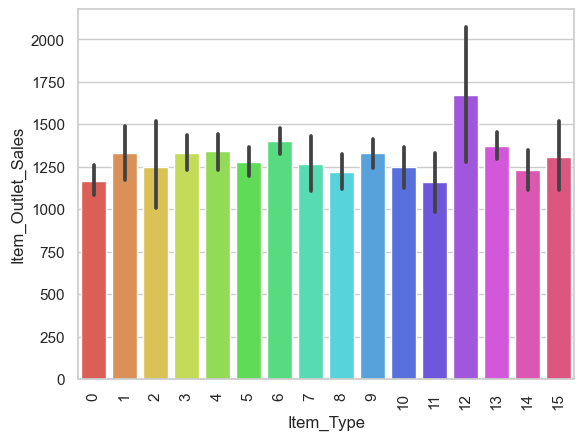

In [90]:
sns.barplot(x='Item_Type',y='Item_Outlet_Sales',data=combine,palette='hls',saturation=8)
plt.xticks(rotation=90)
plt.show()

### Using a boxplot to see the outliers in each item type

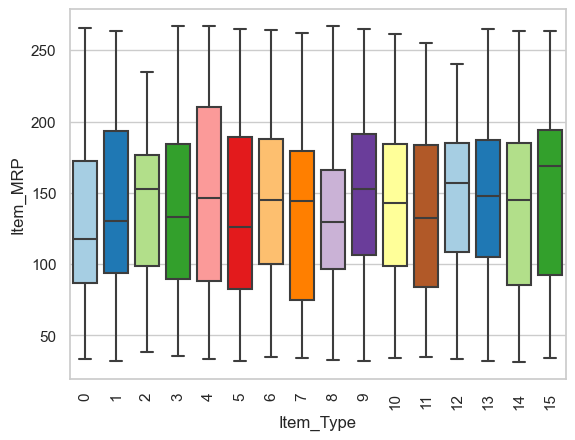

In [91]:
sns.boxplot(x='Item_Type',y='Item_MRP',data=combine,palette='Paired',saturation=8)
plt.xticks(rotation=90)
plt.show()

### Predictive Modelling

In [92]:
combine.dtypes

Item_Identifier                int32
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Identifier              int32
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Sales            float64
dtype: object

In [93]:
predictors=['Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Size','Outlet_Location_Type','Outlet_Type','Outlet_Year',
            'Outlet','Item','Item_Weight']
predictors

['Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Outlet_Year',
 'Outlet',
 'Item',
 'Item_Weight']

In [94]:
seed = 240
np.random.seed(seed)

In [95]:
X.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,3,2,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,994.7052


In [96]:
y.head()

0    1
1    2
2    1
3    0
4    1
Name: Outlet_Type, dtype: int32

In [97]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)

In [98]:
X_train.shape

(10653, 11)

In [99]:
X_test.shape

(3551, 11)

In [100]:
y_train.shape

(10653,)

In [101]:
y_test.shape

(3551,)

In [102]:
lr = LinearRegression()

In [103]:
model = lr.fit(X_train,y_train)
predictions = lr.predict(X_test)

In [104]:
predictions[:5]

array([2.25203159, 1.15466646, 1.24506558, 2.58090593, 1.3058321 ])

### Plotting the model

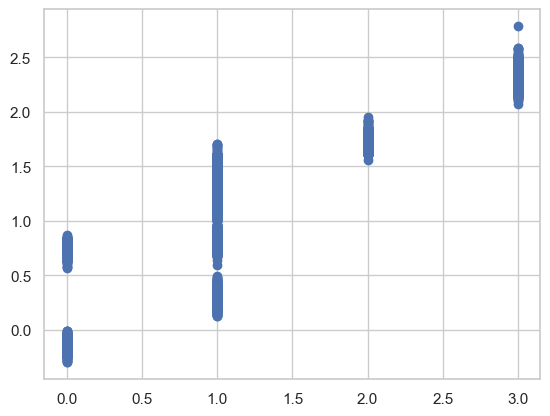

In [105]:
plt.scatter(y_test,predictions)
plt.show()

In [106]:
print("Linear Regression Model Score:",model.score(X_test,y_test))

Linear Regression Model Score: 0.6392091886460738


In [107]:
#Root mean squared error
original_values = y_test
rmse = np.sqrt(metrics.mean_squared_error(original_values,predictions))
print("Linear Regression R2 score: ",metrics.r2_score(original_values,predictions))

Linear Regression R2 score:  0.6392091886460738


In [108]:
print("Linear Regression RMSE: ", rmse)

Linear Regression RMSE:  0.47333980659188674


In [109]:
# Linear Regression with statsmodels
x = sm.add_constant(X_train)
results = sm.OLS(y_train,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Outlet_Type   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     1779.
Date:                Thu, 23 Nov 2023   Prob (F-statistic):               0.00
Time:                        00:05:45   Log-Likelihood:                -7170.7
No. Observations:               10653   AIC:                         1.437e+04
Df Residuals:                   10641   BIC:                         1.445e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         4.0521      1.261      3.213      0.001       1.580       6.524
Item_Identifier            1.085e-05   1.03e-05      1.052      0.293   -9.38e-06    3.11e-05
Item_Weight                  -0.0003      0.001     -0.307      0.759      -0.002       0.002
Item_Fat_Content             -0.0010      0.007     -0.137      0.891      -0.015       0.013
Item_Visibility              -0.7497      0.092     -8.156      0.000      -0.930      -0.570
Item_Type                     0.0004      0.001      0.359      0.719      -0.002       0.003
Item_MRP                     -0.0004   7.91e-05     -5.644      0.000      -0.001      -0.000
Outlet_Identifier             0.2273      0.002     91.728      0.000       0.222       0.232
Outlet_Establishment_Year    -0.0024      0.001     -3.735      0.000      -0.004      -0.001
Outlet_Size                  -0.1294      0.006    -22.471      0.000      -0.141      -0.118
Outlet_Location_Type          0.9734      0.009    109.094      0.000       0.956       0.991
Item_Outlet_Sales          4.506e-05   2.94e-06     15.318      0.000    3.93e-05    5.08e-05
==============================================================================
Omnibus:                     5054.598   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              663.799
Skew:                           0.246   Prob(JB):                    7.21e-145
Kurtosis:                       1.881   Cond. No.                     7.51e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.51e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [110]:
predictions = results.predict(x)
predictions.head()

376     1.007699
3852    1.451240
4331    0.232560
2216    1.736174
4355    1.466015
dtype: float64

In [111]:
predictionsDF = pd.DataFrame({"Predictions":predictions})
joined = x.join(predictionsDF)
joined.head()

,const,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Predictions
1,1.0,1078,8.30,4,0.038428,4,87.3198,2,2007,3,1,1.0000,0.273788
1,1.0,1078,8.30,4,0.038428,4,87.3198,2,2007,3,1,1.0000,1.775382
1,1.0,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,443.4228,0.273788
1,1.0,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,443.4228,1.775382
2,1.0,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,2097.2700,1.253839


In [112]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [113]:
predictions = regressor.predict(X_test)
predictions[:5]

array([3., 1., 1., 3., 1.])

In [114]:
results = pd.DataFrame({'Actual':y_test,'Predicted':predictions})
results.head()

,Actual,Predicted
5567,3,3.0
4098,1,1.0
5406,1,1.0
7562,3,3.0
3666,1,1.0


### BIG MART SALES VISUALIZATION

<AxesSubplot:ylabel='Item_Outlet_Sales'>

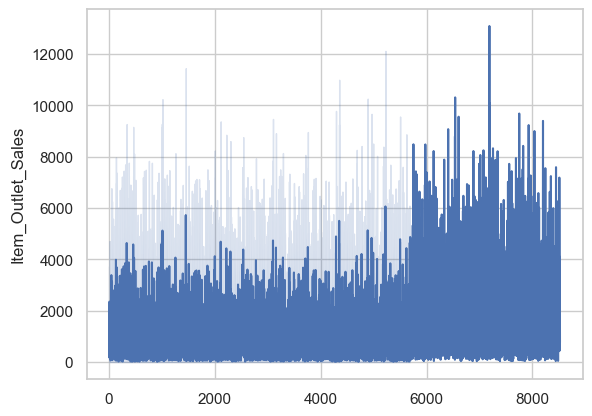

In [115]:
import seaborn as sns
sns.lineplot(data = combine['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

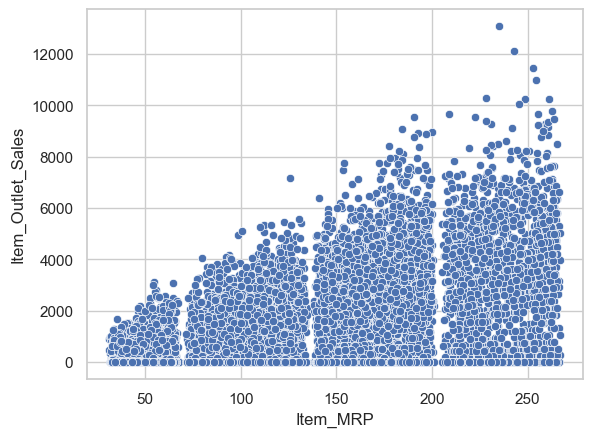

In [116]:
sns.scatterplot(x = combine['Item_MRP'],y=combine['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

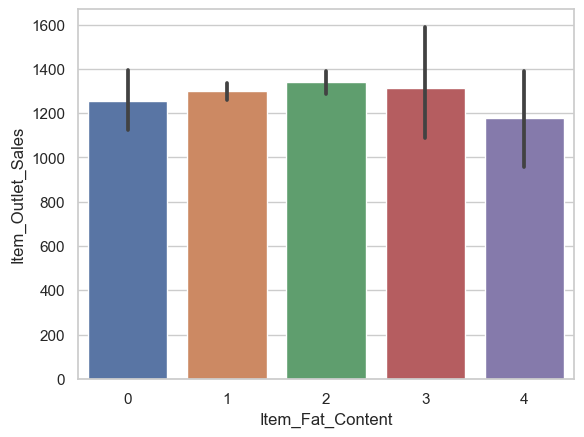

In [117]:
sns.barplot(x = combine['Item_Fat_Content'], y = combine['Item_Outlet_Sales'])

In [ ]:
sns.swarmplot(x=combine['Outlet_Location_Type'],y=combine['Item_Outlet_Sales'])

In [ ]:
sns.distplot(a = combine['Item_Outlet_Sales'])

In [ ]:
sns.kdeplot(data = combine['Item_Outlet_Sales'], shade = True)

In [ ]:
combine[['Item_MRP','Item_Outlet_Sales']].reset_index()

In [ ]:
duplicates = combine['Item_Outlet_Sales'].index.duplicated()
duplicates

In [ ]:
combine = combine[~duplicates].reset_index(drop=True)
combine

In [ ]:
sns.jointplot(x = combine['Item_MRP'],y = combine['Item_Outlet_Sales'])

In [ ]:
combine.boxplot(column='Item_Weight', by='Outlet_Identifier') #, rot=10)

In [ ]:
# average weight per item
item_av_weight = combine.pivot_table(values='Item_Weight', index='Item_Identifier')
item_av_weight.head()

In [ ]:
combine['Item_Outlet_Sales'] = combine['Item_Outlet_Sales']/combine['Item_MRP']

In [ ]:
# average weight per item
item_av_weight = combine.pivot_table(values='Item_Weight', index='Item_Identifier')
item_av_weight.head()

In [ ]:
combine.pivot_table(values='Outlet_Type', index='Outlet_Identifier', aggfunc=(lambda x:mode(x).mode[0]))

In [ ]:
combine['Outlet_Size'] = combine['Outlet_Size'].fillna('unknown')
outlet_type_mode_size = combine.pivot_table(values='Outlet_Size', index='Outlet_Type', aggfunc=(lambda x:mode(x).mode[0]))
outlet_type_mode_size

In [ ]:
# check out the frequecy of each different category in each nomical value

# filter the categorical variables
categorical_columns = [x for x in combine.dtypes.index if combine.dtypes[x]=='object']

# exclude the id and source columns
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier', 'source']]

# print the frequency of categories
for col in categorical_columns:
    print('\nFrequency of Categories for variable %s'%(col))
    print(combine[col].value_counts())

In [ ]:
# sales per Outlet_Type
ax = combine.boxplot(column='Item_Outlet_Sales', by='Outlet_Type', rot=90)
ax.set_ylabel('Item_Outlet_Sales')
ax.set_title('')

In [ ]:
data = pd.concat([train,test])

In [ ]:
# sales per Outlet_Identifier
ax = combine.boxplot(column='Item_Outlet_Sales', by='Outlet_Identifier', rot=90)
ax.set_ylabel('Item_Outlet_Sales')
ax.set_title('')

In [ ]:
# print Outlet_Type of OUT010 and Out019
outlet_identifier_mode_size = combine.pivot_table(values='Outlet_Size', index='Outlet_Identifier', aggfunc=(lambda x:mode(x).mode[0]))
outlet_identifier_mode_size

In [ ]:
# replace the Outlet_Size of the Grocery Store in the pivot table with small
outlet_type_mode_size.loc['Grocery Store'] = 'Small'
outlet_type_mode_size

In [ ]:
outlet_identifier_mode_size = combine.pivot_table(values='Outlet_Size', index='Outlet_Identifier', aggfunc=(lambda x:mode(x).mode[0]))
outlet_identifier_mode_size

In [ ]:
# create a mask of the missing data in Item_Weight
null_mask_size = combine['Outlet_Size']=='unknown'

# impute values
combine.loc[null_mask_size, 'Outlet_Size'] = combine.loc[null_mask_size, 'Outlet_Type'].apply(lambda x: outlet_type_mode_size.loc[x])


In [ ]:
combine.pivot_table(values='Outlet_Type', index='Outlet_Identifier', aggfunc=(lambda x:mode(x).mode[0]))

In [ ]:
# check how many entries have 0
combine['Item_Visibility'].value_counts().head()

In [ ]:
# visual check that the 0 values in the firs 10 entries have been replaced
combine['Item_Visibility'] = train['Item_Visibility'].replace({0:np.nan})

In [ ]:
# pivot table with the mean values that will be used to replace the nan values
table = combine.pivot_table(values='Item_Visibility', index='Item_Type', columns='Outlet_Type', aggfunc='mean')
table

Combine Low Fat, low fat and LF to Low Fat and reg and Regular to Regular

In [ ]:
combine['Item_Fat_Content'] = combine['Item_Fat_Content'].replace({'LF': 'Low Fat', 
                                                             'low fat': 'Low Fat', 
                                                             'reg': 'Regular'})
combine['Item_Fat_Content'].head(5)

In [ ]:
print('\nFrequency of Categories for variable Item_Fat_Content')
print(combine['Item_Fat_Content'].value_counts())

Convert the Outlet_Establishment_Years into how old the establishments are

In [ ]:
combine['Outlet_Age'] = 2023 - combine['Outlet_Establishment_Year']
combine['Outlet_Age'].head(5)

In [ ]:
combine['Outlet_Age'].describe()

In [ ]:
ax = sns.distplot(combine['Item_MRP'])
x1=72
x2=138
x3=204
ax.plot([x1, x1],[0, 0.005], color='r')
ax.plot([x2, x2],[0, 0.008],color='b')
ax.plot([x3, x3],[0, 0.006],color='g')
plt.show()

The Item_MRP clearly shows there are 4 different price categories. So we define them to be 'Low', 'Medium', 'High', 'Very High'.

In [ ]:
def price_cat(x):
    if x <= x1:
        return 'Low'
    elif (x > x1) & (x <= x2):
        return 'Medium'
    elif (x > x2) & (x <= x3):
        return 'High'
    else:
        return 'Very High'

combine['Item_MRP_Category'] = combine['Item_MRP']
combine['Item_MRP_Category'] = combine['Item_MRP_Category'].apply(price_cat)
combine['Item_MRP_Category'].value_counts()

## Analysis
## Numerical data

In [ ]:
data.describe()

As we have seen previously, the Item_MRP is clearly divided into 4 categories. Now, let's plot the Item_MRP grouped by the Outlet_Type and Outle_Size.

In [ ]:
ax = combine.hist(column='Item_MRP' , by='Outlet_Type', bins=25, density=True)

In [ ]:
ax = combine.hist(column='Item_MRP' , by='Outlet_Size', bins=40, density=True)

In [ ]:
ax = combine.hist(column='Item_MRP' , by='Outlet_Identifier', bins=25, density=True)

Explore how Item_MRP depends on Outlet_Type:

In [ ]:
ax = sns.boxplot(data=combine, x='Outlet_Type', y='Item_MRP')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
leg = ax.legend()
ax.legend(loc='center right', bbox_to_anchor=(1.45, 0.5))

Item_Outlet_Sales

Item_Outlet_Sales are very low for Grocery Stores, even though we saw above the Item_MRP is the same for all Outlet_Types.



Let's Explore if this is because of the Outlet_Size.

In [ ]:
ax = sns.boxplot(data=combine, x='Item_Type', y='Item_Outlet_Sales', hue='Outlet_Type')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

Grocery stores just sell a smaller number of everything.

In [ ]:
# Item_Outlet_Sales per Outlet_Identifier
ax = sns.boxplot(data=combine, x='Outlet_Identifier', y='Item_Outlet_Sales')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [ ]:
for i in combine['Outlet_Identifier'].unique():
    otype = combine[combine['Outlet_Identifier']==i]['Outlet_Type'].unique()
    osize = combine[combine['Outlet_Identifier']==i]['Outlet_Size'].unique()
    print('Outlet_Identifier: {}, Outlet_Type(s): {}, Outlet_Size: {}'.format(i, otype, osize))

In [ ]:
combine['Item_Number_Sales'] = combine['Item_Outlet_Sales']/combine['Item_MRP']

In [ ]:
ax = sns.boxplot(data=combine, x='Item_Type', y='Item_Number_Sales', hue='Outlet_Type')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
leg = ax.legend()
ax.legend(loc='center right', bbox_to_anchor=(1.45, 0.5))

In [ ]:
# Item_Outlet_Sales per Outlet_Identifier
ax = sns.boxplot(data=combine, x='Outlet_Identifier', y='Item_Number_Sales')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

### Item_outlet_sales and Item_MRP vs Item_Visibility

In [ ]:
sns.pairplot(data=combine, x_vars='Item_MRP', y_vars='Item_Number_Sales', hue='Outlet_Type', size=5)

In [ ]:
sns.pairplot(data=combine, x_vars='Item_MRP', y_vars='Item_Outlet_Sales', hue='Outlet_Type', size=5)

In [ ]:
cor1 = combine['Item_MRP'].corr(combine['Item_Outlet_Sales'])
cor2 = combine['Item_MRP'].corr(combine['Item_Number_Sales'])
print('Correlation between Item_MRP and Item_Outlet_Sales: {}'.format(cor1))
print('Correlation between Item_MRP and Item_Number_Sales: {}'.format(cor2))

In [ ]:
sns.pairplot(data=combine, x_vars='Item_Visibility', y_vars='Item_Outlet_Sales', hue='Outlet_Type', size=5)

In [ ]:
sns.pairplot(data=combine, x_vars='Item_Visibility', y_vars='Item_Number_Sales', hue='Outlet_Type', size=5)

In [ ]:
# check out the frequecy of each different category in each nomical value

# filter the categorical variables
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']

# exclude the id and source columns
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier', 'source']]

# print the frequency of categories
for col in categorical_columns:
    print('\nFrequency of Categories for variable %s'%(col))
    print(data[col].value_counts())

In [ ]:
data

In [ ]:
train['Item_Type_New'] = train.Item_Identifier
train.Item_Type_New.head(10)

In [ ]:
#visualizing corelation
corrmat = combine.corr()
corrmat